# Bài tập 2

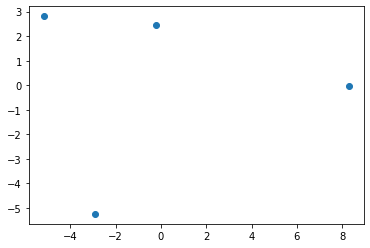

In [1]:
import numpy as np

x = np.array([[1, 2, 1], [4, 2, 13], [7, 8, 1], [8, 4, 5]])
x_bar = np.mean(x, axis=0)
x_hat = x - x_bar
S = 1/len(x) * (x_hat.T @ x_hat)
d, v = np.linalg.eigh(S)
v = v[:,::-1]

k = 2
U = v[:, :k]
Y = x_hat @ U

import matplotlib.pyplot as plt
plt.scatter(Y[:,0], Y[:,1])

# Bài tập 3

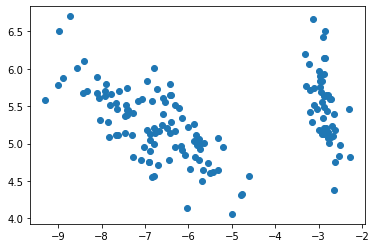

In [42]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
iris = load_iris()
x=iris.data

m = np.mean(x,axis=0)
x_hat = x - m
S = 1/len(x) * (x_hat.T @ x_hat)



d, v = np.linalg.eigh(S)
v = v[:,::-1]
k = 2
U = v[:, :k]
Y = x @ U 
plt.scatter(Y[:,0], Y[:,1])

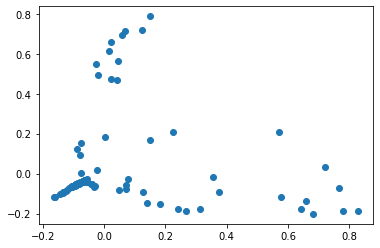

In [41]:

kpca = KernelPCA(n_components=2,kernel="rbf", gamma = 15) #“linear” | “poly” | “rbf” | “sigmoid” | “cosine” | “precomputed”
x_kpca = kpca.fit_transform(x)

plt.scatter(x_kpca[:,0], x_kpca[:,1])

# Bài tập 4

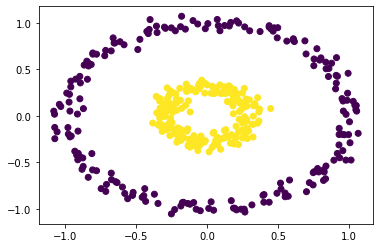

In [29]:
# KPCA
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

x, y = make_circles(n_samples=400, factor=.3, noise=.05)

reds = y == 0
blues = y == 1
m = np.mean(x,axis=0)
x_hat = x - m
S = 1/len(x) * (x_hat.T @ x_hat)
d, v = np.linalg.eigh(S)
v = v[:,::-1]


d, v = np.linalg.eigh(S)
v = v[:,::-1]
k = 2
U = v[:, :k]
Y = x @ U 
plt.scatter(Y[:,0], Y[:,1], c = y)

Text(0.5, 1.0, 'Projection by KPCA')

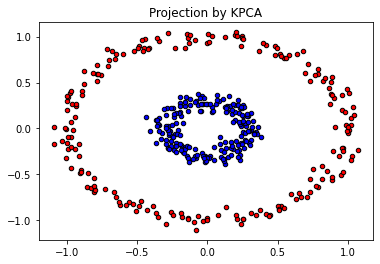

In [30]:
plt.scatter(x[reds, 0], x[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(x[blues, 0], x[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")

Text(0.5, 1.0, 'Projection by KPCA')

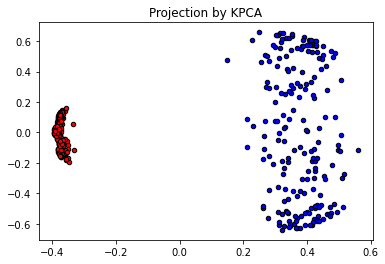

In [31]:
kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5) #“linear” | “poly” | “rbf” | “sigmoid” | “cosine” | “precomputed”
x_kpca = kpca.fit_transform(x)

plt.scatter(x_kpca[reds, 0], x_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(x_kpca[blues, 0], x_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")

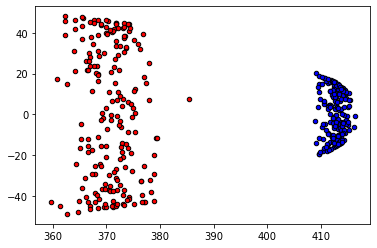

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

x, y = make_circles(n_samples=400, factor=.3, noise=.05)

reds = y == 0
blues = y == 1
# plt.scatter(x[reds, 0], x[reds, 1], c="red", s=20, edgecolor='k')
# plt.scatter(x[blues, 0], x[blues, 1], c="blue", s=20, edgecolor='k')

def k(x,y):
#     return (x.T@y + 1)**2
    return np.exp(-np.linalg.norm(x-y)**2/(2*2**2))

K = np.zeros((400,400))
for i in range(len(x)):
    for j in range(len(x)):
        K[i,j] = k(x[i],x[j])

n = len(x)
C = K - (1/n)*np.ones((n,n))@K - (1/n)*K@np.ones((n,n)) - (1/n**2)*np.ones((n,n))@K@np.ones((n,n))

d, v = np.linalg.eigh(C)
d = d[::-1]
v = v[:,::-1]

dk, vk = np.linalg.eigh(K)
dk = dk[::-1]
vk = vk[:,::-1]

Y = np.zeros((400,2))
Y[:,0] = d[0]*(K@vk[:,0])
Y[:,1] = d[1]*(K@vk[:,1])

plt.scatter(Y[reds, 0], Y[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(Y[blues, 0], Y[blues, 1], c="blue", s=20, edgecolor='k')